In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import bartlett
import os
import random
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.stats.anova import anova_lm

In [2]:
#Importing the data
data = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

In [3]:
#Exploring the data
data.head(5)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [4]:
data.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [31]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
df1 = data.groupby(pd.Grouper(key='Timestamp', freq="Y")).mean()
df1

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,Productivity,Social Connection,Meaning,Achievement
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-31,3.041729,5.506706,5.591157,5.633383,6.560358,4.097367,2.586190,1.386488,5.843517,3.177347,...,2.920020,1.721808,5.969697,3.319424,6.406359,668.922901,4.510432,6.075758,5.402881,5.033532
2016-12-31,2.844351,5.140024,5.308293,5.403546,6.483474,3.855168,2.693810,1.383113,5.520433,3.021334,...,2.995493,1.705228,5.597656,3.158353,6.242188,663.594712,4.270883,5.895883,5.395583,4.726412
2017-12-31,2.914410,5.292524,5.496569,5.666667,6.543156,3.946912,2.719032,1.413146,5.706031,3.114843,...,2.924883,1.734922,5.709281,3.280246,6.263994,666.735283,4.410437,6.019863,5.552365,4.828097
2018-12-31,3.069215,5.601240,5.662707,5.787190,6.823864,4.054236,2.774277,1.399793,5.844008,3.192665,...,2.809401,1.764463,5.791839,3.310434,6.225207,671.728409,4.518337,6.243285,5.667872,4.923037
2019-12-31,2.866282,5.211462,5.376277,5.474012,6.362950,3.893381,2.721901,1.426477,5.680586,3.131053,...,2.899600,1.733452,5.515771,3.250111,6.192359,664.533585,4.405820,5.869614,5.458907,4.704576
2020-12-31,2.890738,4.957627,5.661017,5.728511,6.282082,4.144068,2.740315,1.440981,5.902845,3.457930,...,2.968220,1.722760,5.748487,3.576574,6.135593,667.026423,4.680387,5.971550,5.604570,4.946277
2021-12-31,2.902965,4.797844,5.566038,6.035040,5.973046,4.280323,3.010782,1.460916,6.026954,3.495957,...,2.946092,1.778976,5.789757,3.541779,6.148248,668.445822,4.761456,5.769542,6.028302,5.035040


In [52]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
df2 = data.groupby(pd.Grouper(key='Timestamp', freq="M")).mean()
df2.head(12)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,Productivity,Social Connection,Meaning,Achievement
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-07-31,3.086758,2.826484,5.424658,5.392694,5.789954,6.228311,3.570776,2.570776,1.365297,6.004566,...,3.018265,1.735160,6.082192,3.022831,6.287671,667.352055,4.454338,5.810502,5.465753,4.826484
2015-08-31,3.156499,2.533156,5.222812,5.644562,5.350133,6.262599,4.063660,2.509284,1.419098,5.901857,...,2.740053,1.761273,6.116711,3.172414,6.506631,667.720690,4.444297,5.953581,5.184350,5.090186
2015-09-30,3.010336,2.713178,5.519380,5.992248,5.560724,7.242894,3.974160,2.116279,1.343669,5.767442,...,2.777778,1.754522,5.906977,3.129199,6.457364,670.424548,4.405685,6.617571,4.896641,4.940568
2015-10-31,3.066015,2.860636,5.948655,5.430318,5.599022,6.158924,4.327628,2.772616,1.442543,6.034230,...,3.237164,1.667482,6.151589,3.845966,6.520782,668.828851,4.809291,5.794621,5.572127,5.239609
2015-11-30,2.934673,2.814070,5.489950,5.336683,5.690955,6.675879,4.213568,2.761307,1.402010,5.603015,...,2.896985,1.693467,5.836683,3.376884,6.201005,668.008291,4.453518,6.006281,5.606784,5.025126
2015-12-31,3.004484,2.739910,5.264574,5.748879,6.044843,6.735426,4.255605,2.892377,1.295964,5.798206,...,2.834081,1.735426,5.623318,3.121076,6.421525,671.696861,4.412556,6.242152,5.914798,4.939462
2016-01-31,2.846405,2.810458,5.081699,5.539216,5.225490,6.656863,3.562092,2.696078,1.418301,5.813725,...,3.130719,1.686275,5.764706,2.882353,6.326797,661.780392,4.271242,6.098039,5.308824,4.663399
2016-02-29,2.788591,2.848993,4.986577,4.949664,5.221477,6.033557,3.936242,2.889262,1.359060,5.637584,...,2.946309,1.684564,5.590604,3.211409,6.697987,663.753356,4.333893,5.491611,5.500000,4.763423
2016-03-31,2.765027,2.888889,4.431694,5.457195,5.285974,6.848816,3.759563,2.621129,1.409836,4.972678,...,2.970856,1.633880,5.256831,3.275046,5.777778,657.906193,4.004554,6.153005,5.264117,4.508197


In [6]:
#Creating new variables
data['Productivity'] = (data['TODO_COMPLETED'] + data['FLOW'])/2
data['Social Connection'] = (data['CORE_CIRCLE'] + data['SOCIAL_NETWORK'])/2
data['Meaning'] = (data['SUPPORTING_OTHERS'] + data['DONATION']*2)/2
data['Achievement'] = (data['ACHIEVEMENT'] + data['PERSONAL_AWARDS'])/2

In [7]:
#Collapsing the variables into categories for further analysis
pd.cut(data['Meaning'], bins=3).value_counts(sort=False)
labels = ['Weak', 'Ordinary', 'Strong']
data['Level of Meaning'] = pd.cut(data['Meaning'], bins=3, labels=labels)
data['Level of Meaning']

0            Weak
1        Ordinary
2        Ordinary
3          Strong
4          Strong
           ...   
15967    Ordinary
15968    Ordinary
15969      Strong
15970        Weak
15971    Ordinary
Name: Level of Meaning, Length: 15972, dtype: category
Categories (3, object): ['Weak' < 'Ordinary' < 'Strong']

In [42]:
pd.cut(data['Productivity'], bins=3).value_counts(sort=False)
labels = ['Low','Ordinary','High']
data['Level of Productivity'] = pd.cut(data['Productivity'], bins=3, labels = labels)
data['Level of Productivity']

0        Ordinary
1        Ordinary
2             Low
3        Ordinary
4             Low
           ...   
15967    Ordinary
15968    Ordinary
15969    Ordinary
15970        High
15971    Ordinary
Name: Level of Productivity, Length: 15972, dtype: category
Categories (3, object): ['Low' < 'Ordinary' < 'High']

In [9]:
pd.cut(data['Achievement'], bins=3).value_counts(sort=False)
labels = ['Low', 'Ordinary', 'High' ]
data['Level of Achievement'] = pd.cut(data['Achievement'], bins=3, labels=labels)
data['Level of Achievement']

0             Low
1        Ordinary
2        Ordinary
3        Ordinary
4        Ordinary
           ...   
15967         Low
15968        High
15969        High
15970         Low
15971         Low
Name: Level of Achievement, Length: 15972, dtype: category
Categories (3, object): ['Low' < 'Ordinary' < 'High']

In [10]:
pd.cut(data['Social Connection'], bins=3).value_counts(sort=False)
labels = ['Weak', 'Ordinary', 'Strong']
data['Level of Social Connection'] = pd.cut(data['Social Connection'], bins=3, labels = labels)
data['Level of Social Connection']

0        Ordinary
1        Ordinary
2          Strong
3        Ordinary
4        Ordinary
           ...   
15967      Strong
15968    Ordinary
15969      Strong
15970      Strong
15971    Ordinary
Name: Level of Social Connection, Length: 15972, dtype: category
Categories (3, object): ['Weak' < 'Ordinary' < 'Strong']

In [11]:
corrMatrix = data.corr()
print(corrMatrix)

                         FRUITS_VEGGIES  PLACES_VISITED  CORE_CIRCLE  \
FRUITS_VEGGIES                 1.000000        0.254889     0.157774   
PLACES_VISITED                 0.254889        1.000000     0.255877   
CORE_CIRCLE                    0.157774        0.255877     1.000000   
SUPPORTING_OTHERS              0.204461        0.237847     0.337718   
SOCIAL_NETWORK                 0.106941        0.149253     0.308657   
ACHIEVEMENT                    0.162902        0.257917     0.289417   
DONATION                       0.199457        0.204478     0.221758   
BMI_RANGE                     -0.092967       -0.108139    -0.026055   
TODO_COMPLETED                 0.227005        0.227652     0.224361   
FLOW                           0.133073        0.138559     0.237885   
DAILY_STEPS                    0.251213        0.196110     0.148006   
LIVE_VISION                    0.110105        0.143699     0.219937   
SLEEP_HOURS                    0.103627        0.127311     0.06

<AxesSubplot:xlabel='Productivity', ylabel='Density'>

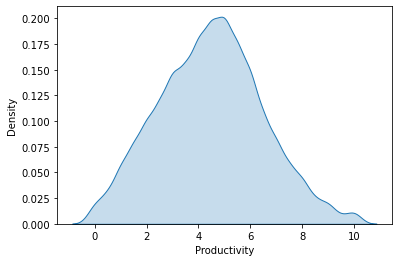

In [12]:
#Exploring the dependent variables of our analysis, Productivity. 
sns.kdeplot(data['Productivity'], shade = True, label = 'Productivity')

<AxesSubplot:xlabel='Social Connection', ylabel='Density'>

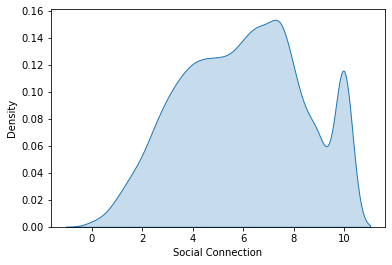

In [77]:
sns.kdeplot(data['Social Connection'], shade = True, label = 'Social Connection')

<AxesSubplot:xlabel='FLOW', ylabel='Density'>

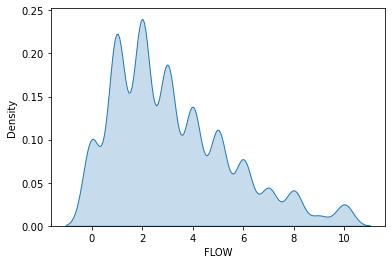

In [49]:
sns.kdeplot(data['FLOW'], shade = True, label = 'Hours of Flow')

<AxesSubplot:xlabel='TODO_COMPLETED', ylabel='Density'>

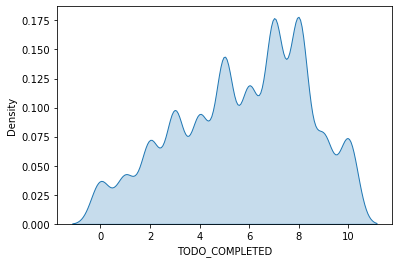

In [50]:
sns.kdeplot(data['TODO_COMPLETED'], shade = True, label = 'Complete to-do list')

<AxesSubplot:xlabel='SUFFICIENT_INCOME', ylabel='Productivity'>

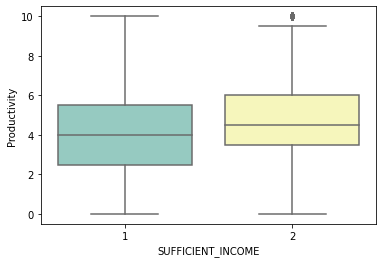

In [86]:
sns.boxplot(x = 'SUFFICIENT_INCOME', y = 'Productivity', data = data, palette="Set3")

In [ ]:
sns.boxplot(x = 'GENDER', y = 'Productivity', data = data, palette="Set3")

In [74]:
data['AGE']=data['AGE'].replace('Less than 20', '20 or less')
data_prod5 = data.pivot_table(values='Productivity', index=['AGE'], columns=['GENDER'])
data_prod5

#The group with the highest level of productivity is women over 51 years old
##The group with the lowest level of productivity is men between 21 to 35 

GENDER,Female,Male
AGE,,
20 or less,4.413615,4.255305
21 to 35,4.422056,4.197117
36 to 50,4.593718,4.302538
51 or more,4.842645,4.617379


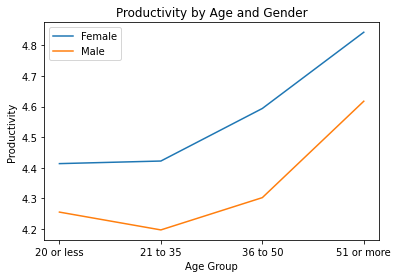

In [75]:
plt.plot(data_prod5)
plt.title('Productivity by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Productivity')
plt.legend(['Female', 'Male'])
plt.show()

In [72]:
data_prod6 = data.pivot_table(values='Social Connection', index=['AGE'], columns=['GENDER'])

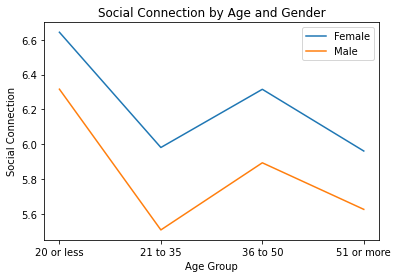

In [73]:
plt.plot(data_prod6)
plt.title('Social Connection by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Social Connection')
plt.legend(['Female', 'Male'])
plt.show()

<AxesSubplot:xlabel='Level of Social Connection', ylabel='Productivity'>

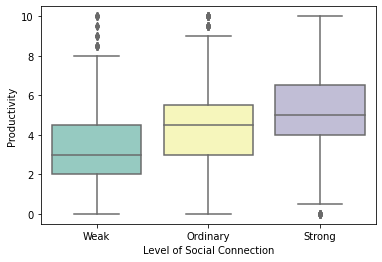

In [23]:
#Exploring the relashionship between Productivity and Social Connection 
sns.boxplot(x = 'Level of Social Connection', y = 'Productivity', data = data, palette="Set3")

#We can clearly see that people with strong social connection are more productive on average. 

<AxesSubplot:xlabel='Level of Social Connection', ylabel='Productivity'>

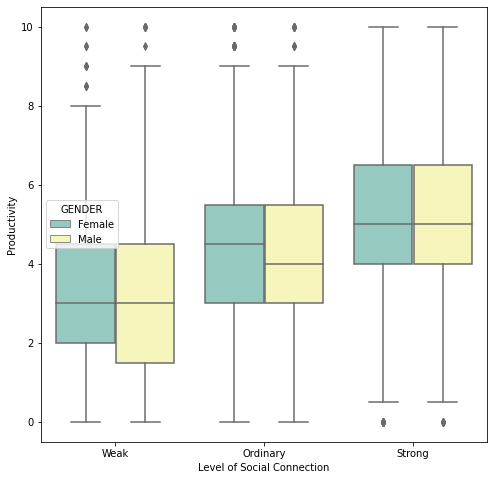

In [84]:
plt.figure(figsize = (8,8))
sns.boxplot(data = data, x = 'Level of Social Connection', y = 'Productivity', hue = 'GENDER', palette="Set3")

In [91]:
data['SUFFICIENT_INCOME']=data['SUFFICIENT_INCOME'].replace(1, 'Not or hardly sufficient')
data['SUFFICIENT_INCOME']=data['SUFFICIENT_INCOME'].replace(2, 'Sufficient')
data['SUFFICIENT_INCOME']

0        Not or hardly sufficient
1                      Sufficient
2                      Sufficient
3        Not or hardly sufficient
4                      Sufficient
                   ...           
15967    Not or hardly sufficient
15968                  Sufficient
15969                  Sufficient
15970                  Sufficient
15971                  Sufficient
Name: SUFFICIENT_INCOME, Length: 15972, dtype: object

<AxesSubplot:xlabel='Level of Social Connection', ylabel='Productivity'>

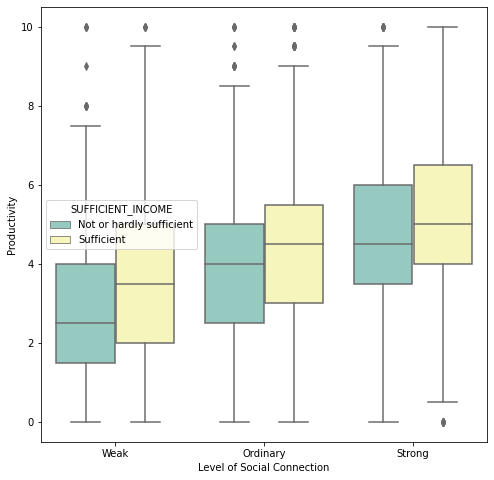

In [92]:
plt.figure(figsize = (8,8))
sns.boxplot(data = data, x = 'Level of Social Connection', y = 'Productivity', hue = 'SUFFICIENT_INCOME', palette="Set3")

In [93]:
data_prod7 = data.pivot_table(values='Social Connection', index=['Level of Social Connection'], columns=['SUFFICIENT_INCOME'])

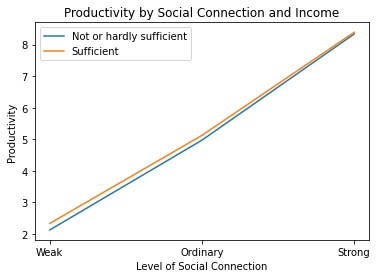

In [95]:
plt.plot(data_prod7)
plt.title('Productivity by Social Connection and Income')
plt.xlabel('Level of Social Connection')
plt.ylabel('Productivity')
plt.legend(['Not or hardly sufficient', 'Sufficient'])
plt.show()

<AxesSubplot:xlabel='Level of Social Connection', ylabel='Productivity'>

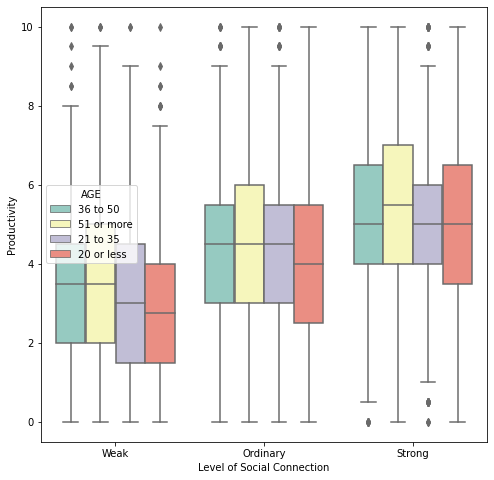

In [85]:
plt.figure(figsize = (8,8))
sns.boxplot(data = data, x = 'Level of Social Connection', y = 'Productivity', hue = 'AGE', palette="Set3")

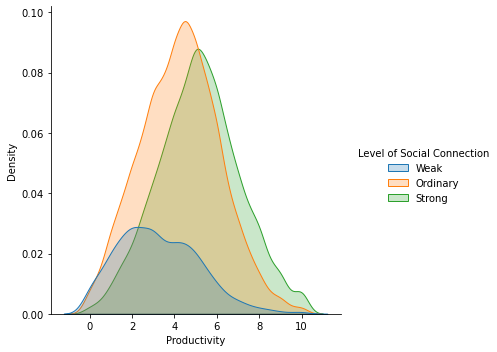

In [76]:
sns.displot(data, x='Productivity', hue='Level of Social Connection', kind="kde", fill=True)

In [24]:
## ONE-WAY ANOVA

data_anova=pd.DataFrame({'Weak Social Connection':data[data['Level of Social Connection']=='Weak']['Productivity'],
                 'Ordinary Social Connection':data[data['Level of Social Connection']=='Ordinary']['Productivity'],
                 'Strong Social Connection':data[data['Level of Social Connection']=='Strong']['Productivity'],
                 })
data_anova.describe()

,Weak Social Connection,Ordinary Social Connection,Strong Social Connection
count,2354.000000,7201.000000,6417.000000
mean,3.259983,4.262741,5.147421
std,1.916875,1.875163,1.930225
min,0.000000,0.000000,0.000000
25%,2.000000,3.000000,4.000000
50%,3.000000,4.500000,5.000000
75%,4.500000,5.500000,6.500000
max,10.000000,10.000000,10.000000


In [25]:
#One of our ANOVA test’s assumptions is that samples should be randomly selected and should be close to Gaussian Distribution. 
#Here I select 10 random samples from each factor or level:

np.random.seed(1234)
dataNew=pd.DataFrame({'Weak Social Connection':random.sample(list(data['Productivity'][data['Level of Social Connection']=='Weak']), 10),
'Ordinary Social Connection':random.sample(list(data['Productivity'][data['Level of Social Connection']=='Ordinary']), 10),
'Strong Social Connection':random.sample(list(data['Productivity'][data['Level of Social Connection']=='Strong']), 10),
})

<AxesSubplot:xlabel='Weak Social Connection', ylabel='Density'>

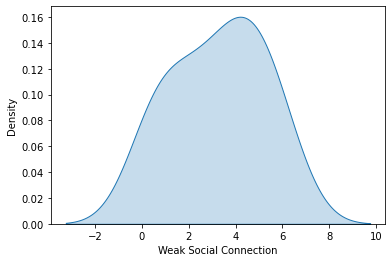

In [26]:
sns.kdeplot(dataNew['Weak Social Connection'], shade = True, label = 'Productivity')

<AxesSubplot:xlabel='Ordinary Social Connection', ylabel='Density'>

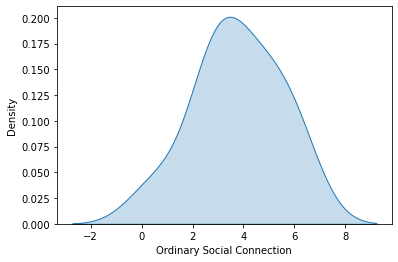

In [27]:
sns.kdeplot(dataNew['Ordinary Social Connection'], shade = True, label = 'Productivity')

<AxesSubplot:xlabel='Strong Social Connection', ylabel='Density'>

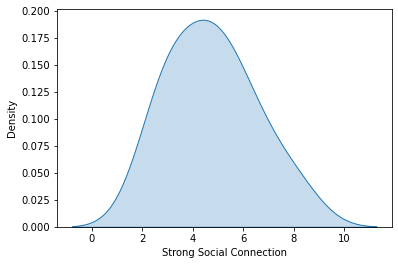

In [28]:
sns.kdeplot(dataNew['Strong Social Connection'], shade = True, label = 'Productivity')

In [ ]:
#The groups seem to be close to Gaussian Distribution.

In [29]:
F, p = stats.f_oneway(dataNew['Weak Social Connection'],dataNew['Ordinary Social Connection'],dataNew['Strong Social Connection'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=1.782, p=0.188


In [30]:
Y = data['Productivity']
X = data['Level of Social Connection']
X = pd.get_dummies(X, columns = ['Level of Social Connection'], drop_first=True)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Productivity   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     924.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:00:15   Log-Likelihood:                -32944.
No. Observations:               15972   AIC:                         6.589e+04
Df Residuals:                   15969   BIC:                         6.592e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2600      0.039     83.088      0.000       3.183       3.337
Ordinary       1.0028      0.045     22.187      0.000       0.914       1.091
Strong         1.8874      0.046     41.147      0.000       1.798       1.977
==============================================================================
Omnibus:                       82.869   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.028
Skew:                           0.157   Prob(JB):                     2.54e-18
Kurtosis:                       2.846   Cond. No.                         5.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Level of Productivity', ylabel='ACHIEVEMENT'>

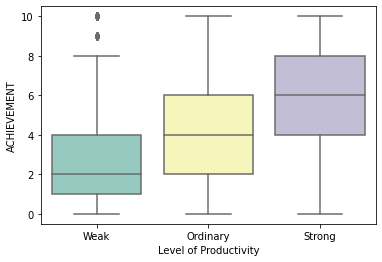

In [32]:
#Exploring the connection between Productivity and Achievement
sns.boxplot(x = 'Level of Productivity', y = 'ACHIEVEMENT', data = data, palette="Set3")

In [34]:
data_prod1 = data.pivot_table(values='Productivity', index=['Level of Achievement'], columns=['GENDER'])
data_prod1

GENDER,Female,Male
Level of Achievement,,
Low,3.636184,3.173315
Ordinary,4.639600,4.367938
High,5.586586,5.621959


In [35]:
data_prod1 = data.pivot_table(values='Productivity', index=['Level of Achievement'], columns=['AGE'])
data_prod1

AGE,20 or less,21 to 35,36 to 50,51 or more
Level of Achievement,,,,
Low,3.257653,3.359631,3.499207,3.727599
Ordinary,4.453634,4.482311,4.518263,4.721809
High,5.633949,5.531145,5.513055,5.780618


<AxesSubplot:xlabel='Level of Meaning', ylabel='Productivity'>

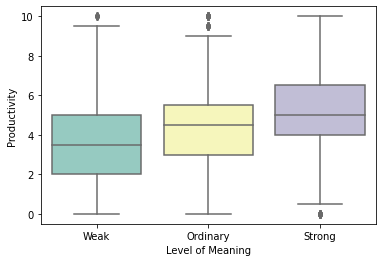

In [36]:
#Exploring the connection between Productivity and Meaning
sns.boxplot(x = 'Level of Meaning', y = 'Productivity', data = data, palette="Set3")

In [37]:
data_prod2 = data.pivot_table(values='Productivity', index=['Level of Meaning'], columns=['AGE'])
data_prod2

AGE,20 or less,21 to 35,36 to 50,51 or more
Level of Meaning,,,,
Weak,3.410088,3.521684,3.534729,3.574903
Ordinary,4.737550,4.454998,4.393030,4.457143
Strong,5.246173,5.059873,5.025420,5.318622


<AxesSubplot:xlabel='Level of Productivity', ylabel='TIME_FOR_PASSION'>

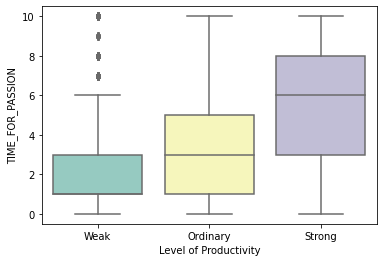

In [38]:
#Exploring the connection between Productivity and TIME_FOR_PASSION
sns.boxplot(x = 'Level of Productivity', y = 'TIME_FOR_PASSION', data = data, palette="Set3")

In [40]:
#Exploring the connection between Productivity and DAILY_STRESS
data['DAILY_STRESS']=pd.to_numeric(data['DAILY_STRESS'],errors = 'coerce')
data_stress = data.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
data_stress.head()

GENDER,Female,Male
AGE,,
20 or less,3.045070,2.347480
21 to 35,2.992375,2.569758
36 to 50,2.948666,2.799292
51 or more,2.728939,2.418562


<AxesSubplot:xlabel='Level of Productivity', ylabel='DAILY_STRESS'>

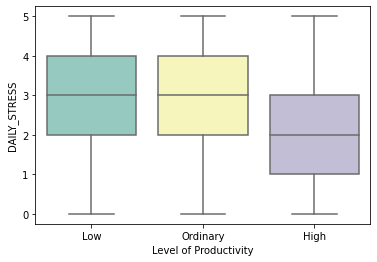

In [43]:
sns.boxplot(x = 'Level of Productivity', y = 'DAILY_STRESS', data = data, palette="Set3")

<AxesSubplot:xlabel='Level of Productivity', ylabel='LIVE_VISION'>

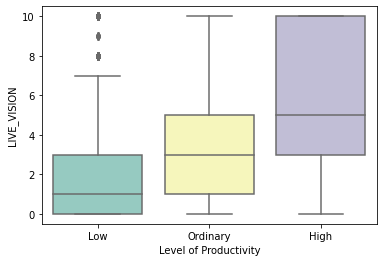

In [48]:
#Exploring the connection between Productivity and LIVE_VISION
sns.boxplot(x = 'Level of Productivity', y = 'LIVE_VISION', data = data, palette="Set3")